# Chapter 2 자연어와 단어의 분산 표현

고전적 기법부터

## 2.1 자연어 처리란

#### 자연어처리(Natural Language Processing, NLP): 
컴퓨터가 사람의 말을 이해시키기 위한 분야

#### 관련 분야
검색 엔진, 기계 번역, 질의응답 시스템, IME(입력기 전환), 문장 자동요약, 감정분석 등

#### IBM의 왓슨(Watson)  
질의응답 시스템의 대표주자  
의사결정 지원 시스템에서 시작해서 의료 분야까지 확장

### 2.1.1 단어의 의미

단어: 의미의 최소 단위 - 단어의 의미를 이해시키는 것이 중요

#### 기법
- 시소러스를 활용한 기법
    - 사람이 직접만든 시소러스(유의어사전, thesaurus)를 이용
- 통계 기반 기법
- 추론 기반 기법(word2vec)  
    - 신경망을 활용

## 2.2 시소러스

유의어 사전으로 동의어, 유의어가 한 그룹으로 분류되어 있다.  
단어 사이의 관계를 구분하는 경우도 있다(상위-하위, 전체-부분 등).  
모든 단어들의 관계를 그래프로 표현할 수 있다(단어 네트워크).  
단어 네트워크를 이용해서 컴퓨터가 단어의 의미를 이해하도록 학습시킬 수 있다.

예시:  
car = auto, automobile, machine, motorcar  
object - motor vehicle - (car, go-kart, truck)

### 2.2.1 WordNet

가장 유명한 시소러스  
다양한 자연어 처리 어플리케이션에서 활용  
단어 네트워크를 이용해서 단어의 유사도를 구할 수 있다.

### 2.2.2 시소러스의 문제점

#### 1. 시대 변화에 대응하기 어렵다.

시간이 지나면서 새로 생겨나거나 의미가 변하는 단어들이 있다.

#### 2. 사람을 쓰는 비용은 크다.

사람이 사용하는 단어의 수는 매우 방대하다. 이런 방대한 단어들의 관계를 나타내려면 단어 네트워크 또한 너무 방대해진다.

#### 3. 단어의 미묘한 차이를 표현할 수 없다.

비슷한 단어끼리 묶을 수는 있지만, 그 단어간의 미묘한 차이를 표현할 수 없다.

위와 같은 문제를 해결하기 위해서 통계 기반 기법과 추론 기반 기법(신경망)을 사용한다.

## 2.3 통계 기반 기법

**말뭉치(corpus)**: 수집된 대량의 텍스트 데이터
- 컴퓨터가 다루기 쉬운 형태로 가공되어 제공되는 것이 일반적
- 문장을 쓰는 방법, 단어를 선택하는 방법 등 자연어에 대한 사람의 지식이 담겨 있다고 볼 수 있다.

통계 기반 기법의 목표는 말뭉치에서 자동으로, 효율적으로 핵심을 추출하는 것이다.

### 2.3.1 파이썬으로 말뭉치 전처리하기

텍스트 데이터를 단어로 분할하고, 분할된 단어들을 단어 ID 목록을 변화하는 일

In [7]:
# 예시 문장
text = "You say goodbye and I say hello."

In [8]:
# 단어 단위로 분할
text = text.lower()
text = text.replace('.', ' .')

In [9]:
text

'you say goodbye and i say hello .'

In [10]:
words = text.split(' ')

In [11]:
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

정규표현식을 이용하면 더욱 효율적으로 처리할 수 있다.

```{.python}
import re

text = "You say goodbye and I say hello."
re.split('(\W+)?', text)
```

In [12]:
# 단어에 ID를 부여하고 ID를 리스트로 이용할 수 있도록
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [13]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [14]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [15]:
# 단어 목록 -> 단어 ID 목록
import numpy as np

corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [16]:
# 위의 처리 종합
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
            
    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, wrod_to_id, id_to_word

### 2.3.2 단어의 분산 표현

**분산 표현(distributional representation)**: 단어의 의미를 파악할 수 있게 만든 벡터 표현, 고정 길이의 밀집벡터로 표현

### 2.3.3 분포 가설

- 단어의 의미는 주변 단어에 의해 형성된다  
- 단어 자체에는 의미가 없고, 그 단어가 사용된 맥락(context)이 의미를 형성한다.
- 맥락: 특정 단어르 중심에 둔 그 주변 단어
- 윈도우 크기: 맥락의 크기, 주변 단어를 몇 개나 포함할지

### 2.3.4 동시발생 행렬

통계 기반 기법: 분포 가설에 기초해서 특정 단어를 주목했을 때 주변에 어떤 단어가 몇 번 등장하는지 세어 집계하는 방법

In [18]:
import numpy as np
from common.util import preprocess

In [20]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


<img src="./images/fig 2-7.png" width=600>

표가 행렬의 형태를 띤다고 해서 **동시발생 행렬(co-occurrence matrix)**이라고 한다.

In [21]:
# 동시발생 행렬 수동 생성
C = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0]
], dtype=np.int32)

In [22]:
print(C[0])
print(C[4])
print(C[word_to_id['goodbye']])

[0 1 0 0 0 0 0]
[0 1 0 0 0 0 1]
[0 1 0 1 0 0 0]


In [23]:
# 동시발생 행렬 자동 생성
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
                
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
                
    return co_matrix

### 2.3.5 벡터 간 유사도

유사도 측정 방법: 벡터의 내적, 유클리드 거리 등

단어 벡터의 유사도는 **코사인 유사도(cosine similarity)**를 자주 이용한다. 코사인 유사도는 두 벡터가 가리키는 방향이 얼마나 비슷한가를 나타낸다. 방향이 완전히 같다면 1, 반대면 -1이다.

$$similarity(\mathbf{x},\mathbf{y}) = \frac {\mathbf{x} \cdot \mathbf{y}} {\left \Vert \mathbf{x} \right \| \left \Vert \mathbf{y} \right \|} = \frac {x_1y_1 + \dots + x_ny_n} {\sqrt {x^2_1 + \dots + x^2_n} \sqrt {y^2_1 + \dots + y^2_n}}$$

벡터를 정규화하고 내적을 구하는 것이 핵심이다. 

In [25]:
# 코사인 유사도 구현
def cos_similarity(x, y):
    nx = x / np.sqrt(np.sum(x**2))
    ny = y / np.sqrt(np.sum(y**2))
    
    return np.dot(nx, ny)

# 이 경우에는 제로 벡터가 들어오면 0으로 나누는 오류가 발생한다.

In [26]:
# 분모에 작은 값을 더해줘서 0으로 나누는 에러를 방지한다.
def cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x**2)) + eps)
    ny = y / (np.sqrt(np.sum(y**2)) + eps)
    
    return np.dot(nx, ny)

In [27]:
# you와 i의 유사도 구하기
from common.util import preprocess, create_co_matrix, cos_similarity

In [28]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(cos_similarity(c0, c1))

0.7071067691154799


### 2.3.6 유사 단어의 랭킹 표시

#### most_similar() 메소드의 인수

- query: 검색어(단어)
- word_to_id: 단어에서 단어ID로의 딕셔너리
- id_to_word: 단어ID에서 단어로의 딕셔너리
- word_matrix: 단어 벡터들을 한데 모은 행렬. 각 행에는 대응하는 단어의 벡터가 저장되어 있다고 가정한다.
- top: 상위 몇 개까지 출력할지 결정

In [29]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # 검색어를 꺼낸다.
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return
    
    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 코사인 유사도 계산
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' %(id_to_word[i], similarity[i]))
        
        count += 1
        if count >= top:
            return

In [30]:
# 검색어를 you로 지정해서 유사한 단어들을 출력
from common.util import preprocess, create_co_matrix, most_similar

In [31]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


## 2.4 통계 기반 기법 개선하기

### 2.4.1 상호정보량

동시발생 행렬을 만들 때 단순히 발생횟수를 세는 것을 척도로 한다면 문제가 발생한다. 고빈도 단어(예를 들어 the)의 경우 동시발생할 확률이 높아서 어디에서나 높게 나올 수 있기 때문이다.

#### 점별 상호정보량(Pointwise Mutual Information, PMI)

$$PMI(x,y) = log_2 \frac {P(x,y)} {P(x)P(y)}$$

- 동시발생 횟수를 단순히 세면 발생하는 문제를 해결
- 각각의 단어가 단독으로 발생할 확률 대비 두 단어가 동시에 발생할 확률을 계산

#### 양의 상호정보량(Positive PMI, PPMI)

$$PPMI(x,y) = max(0, PMI(x,y))$$

- 동시 발생할 확률이 0일 경우 PMI가 -$\infty$가 되는 문제 해결
- 두 단어의 연관성을 0 이상의 실수로 나타낸다.

In [32]:
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j] * S[i]) + eps)
            M[i, j] = max(0, pmi)
            
            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
                    
    return M

In [33]:
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

In [35]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)
print("동시발생 행렬")
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


#### PPMI 행렬의 문제점
- 어휘 수가 많아지면 행렬의 차원 수가 너무 커진다.
- 원소의 대부분이 0
- 노이즈에 약하고 견고하지 못하다.

### 2.4.2 차원 감소

차원 감소는 중요한 정보는 최대한 유지하면서 차원을 줄이는 것이 중요하다.

차원을 감소시키는 방법으로 **특잇값분해(Singular Value Decomposition, SVD)**를 사용

#### SVD

$$\mathbf{X} = \mathbf{U}\mathbf{S}\mathbf{V}^T$$

- $\mathbf{U}$와 $\mathbf{V}$는 직교행렬
- $\mathbf{S}$는 대각행렬, 대각성분에 특잇값이 큰 순서대로 나열
- $\mathbf{U}$는 단어 공간으로 취급할 수 있다.

<img src="./images/fig 2-9.png" width=500>

#### SVD에 의한 차원 감소 원리

<img src="./images/fig 2-10.png" width=600>

- 행렬 $\mathbf{U}$에서 여분의 열 벡터를 깎아내서 원래의 행렬에 근사할 수 있다.
- 행렬 $\mathbf{S}$에서 작은 값은 중요도가 덜 하기 때문에
- 행렬 $\mathbf{X}$는 행렬 $\mathbf{U}'$라는 차원 감소된 벡터로 표현할 수 있다.

### 2.4.3 SVD에 의한 차원 감소

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

In [38]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

U, S, V = np.linalg.svd(W)

In [42]:
print(C[0])
print(W[0])
print(U[0])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[-3.409e-01 -1.110e-16 -3.886e-16 -1.205e-01  0.000e+00  9.323e-01
  2.226e-16]


In [44]:
print(U[0, :2])

[-3.409e-01 -1.110e-16]


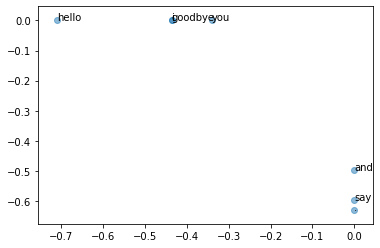

In [45]:
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()

행렬의 크기가 $N$이면 SVD 계산은 $O(N^3)$이 걸린다. 현실에서 사용하기 어렵기 때문에 특잇값이 작은 것은 버리는 Truncated SVD 기법을 사용한다.

### 2.4.4 PTB 데이터셋

**펜 트리뱅크(Penn Treebank, PTB)**
- 벤치마크로 자주 사용됨
- 텍스트 파일로 제공
- 몇 가지 전처리
    - 희소한 단어: <unk\>
    - 숫자: N
- 한 문장이 하나의 줄
- 이 책에서는 문장을 연결하고 각 문장의 끝은 <eos\>

In [46]:
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train') # train: 훈련용, test: 테스트용, valid: 검증용

print('말뭉치 크기:', len(corpus))
print('corpus[:30]', corpus[:30])
print()
print('id_to_word[0]: ', id_to_word[0])
print('id_to_word[1]: ', id_to_word[1])
print('id_to_word[2]: ', id_to_word[2])
print()
print("word_to_id['car']: ", word_to_id['car'])
print("word_to_id['happy']: ", word_to_id['happy'])
print("word_to_id['lexus']: ", word_to_id['lexus'])

Done
말뭉치 크기: 929589
corpus[:30] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]:  aer
id_to_word[1]:  banknote
id_to_word[2]:  berlitz

word_to_id['car']:  3856
word_to_id['happy']:  4428
word_to_id['lexus']:  7426


### 2.4.3 PTB 데이터셋 평가

In [47]:
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

In [49]:
window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('SVD 계산 ...')
try:
    # truncated SVD
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    # SVD
    U, S, V = np.linalg.svd(W)
    
word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

동시발생 수 계산 ...
PPMI 계산 ...


C:\Users\KJK\Kim Jin Kwan\Deep Learning Study\CUAI\2기 딥러닝\Deep-Learning-from-Scratch2\김진관\common\util.py:141: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
C:\Users\KJK\Kim Jin Kwan\Deep Learning Study\CUAI\2기 딥러닝\Deep-Learning-from-Scratch2\김진관\common\util.py:141: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)


1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
SVD 계산 ...

[query] you
 i: 0.6439372301101685
 anybody: 0.6189388036727905
 we: 0.612883448600769
 do: 0.57

단어의 의미나 문법적인 관점에서 비슷한 단어들이 가까운 벡터로 나타났다.